In [44]:
# we don't want to see future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import yfinance as yf

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sentiment_analysis import sentiment_analysis_microservice


In [45]:
WINDOW_SIZE = 100
SENTIMENT_IN_MODEL = 1
NUM_TO_PREDICT = 10

EXTRAPOLATE_DAYS = 200
DAYS_TO_TAKE_FROM_EACH_PREDICTION = 10

In [46]:
# get msft stock closing data
msft = yf.Ticker("MSFT")
msft_data = msft.history(period="max")
msft_df = pd.DataFrame(msft_data.Close)
msft_sentiment = sentiment_analysis_microservice('MSFT')

aapl = yf.Ticker("AAPL")
aapl_data = aapl.history(period="max")
aapl_df = pd.DataFrame(aapl_data.Close)
aapl_sentiment = sentiment_analysis_microservice('AAPL')

nvda = yf.Ticker("NVDA")
nvda_data = nvda.history(period="max")
nvda_df = pd.DataFrame(nvda_data.Close)
nvda_sentiment = sentiment_analysis_microservice('NVDA')

amzn = yf.Ticker("AMZN")
amzn_data = amzn.history(period="max")
amzn_df = pd.DataFrame(amzn_data.Close)
amzn_sentiment = sentiment_analysis_microservice('AMZN')

tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="max")
tsla_df = pd.DataFrame(tsla_data.Close)
tsla_sentiment = sentiment_analysis_microservice('TSLA')

msft_df

,Close
Date,
1986-03-13 00:00:00-05:00,0.060396
1986-03-14 00:00:00-05:00,0.062553
1986-03-17 00:00:00-05:00,0.063632
1986-03-18 00:00:00-05:00,0.062014
1986-03-19 00:00:00-05:00,0.060936
...,...
2023-10-30 00:00:00-04:00,337.309998
2023-10-31 00:00:00-04:00,338.109985
2023-11-01 00:00:00-04:00,346.070007


,Close
count,9481.000000
mean,45.977283
std,76.168438
min,0.056083
25%,3.397310
50%,19.096367
75%,35.296585
max,358.730469


<Axes: xlabel='Date'>

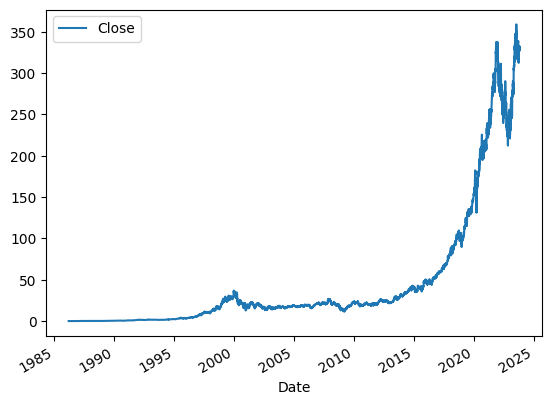

In [47]:
# get a summary of the data and graph
display(msft_df.describe())
msft_df.plot()

,Close
count,9489.000000
mean,46.225271
std,76.613876
min,0.056083
25%,3.402161
50%,19.102581
75%,35.527729
max,358.730469


<Axes: xlabel='Date'>

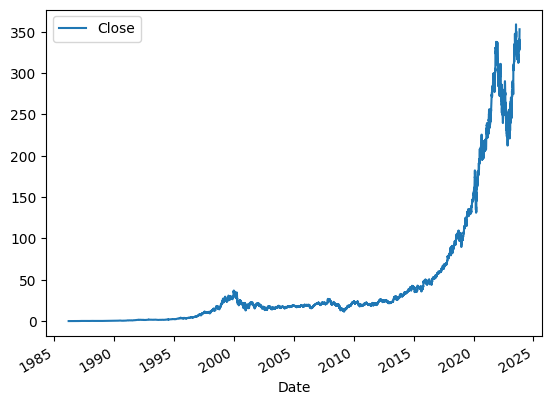

In [48]:
# get a summary of the data and graph
display(msft_df.describe())
msft_df.plot()

In [49]:
# create a function to create the data sets
def create_dataset_from_table(price_df, window_size, num_to_predict):
    close_list = price_df.Close.values
    dataset_x = []
    dataset_y = []

    for i in range(len(close_list) - window_size - num_to_predict):
        dataset_x.append(close_list[i:i + window_size])
        dataset_y.append(close_list[i + window_size:i + window_size + num_to_predict])
    
    return np.array(dataset_x), np.array(dataset_y)

In [50]:
msft_x, msft_y = create_dataset_from_table(msft_df, WINDOW_SIZE, NUM_TO_PREDICT)
aapl_x, aapl_y = create_dataset_from_table(aapl_df, WINDOW_SIZE, NUM_TO_PREDICT)
nvda_x, nvda_y = create_dataset_from_table(nvda_df, WINDOW_SIZE, NUM_TO_PREDICT)
amzn_x, amzn_y = create_dataset_from_table(amzn_df, WINDOW_SIZE, NUM_TO_PREDICT)
tsla_x, tsla_y = create_dataset_from_table(tsla_df, WINDOW_SIZE, NUM_TO_PREDICT)

In [51]:
def append_sentiment_to_stock(stock_x, stock_sentiment):
    new_stock_x = []
    for i in range(len(stock_x)):
        new_stock_x.append(np.append(stock_x[i], stock_sentiment))
    return np.array(new_stock_x)

msft_x = append_sentiment_to_stock(msft_x, msft_sentiment)
aapl_x = append_sentiment_to_stock(aapl_x, aapl_sentiment)
nvda_x = append_sentiment_to_stock(nvda_x, nvda_sentiment)
amzn_x = append_sentiment_to_stock(amzn_x, amzn_sentiment)
tsla_x = append_sentiment_to_stock(tsla_x, tsla_sentiment)

In [52]:

# combine each stock data to make dataset
data_x = np.concatenate((aapl_x, nvda_x, amzn_x, tsla_x))
data_y = np.concatenate((aapl_y, nvda_y, amzn_y, tsla_y))

In [53]:
data_x[0]

array([0.09944949, 0.09426119, 0.08734258, 0.08950439, 0.09209937,
       0.09772008, 0.10247604, 0.10680041, 0.11242121, 0.12279864,
       0.12452803, 0.12150156, 0.11804263, 0.11933977, 0.11674558,
       0.11155634, 0.10680041, 0.10463864, 0.11025934, 0.10939463,
       0.10550337, 0.1059357 , 0.10809753, 0.10723282, 0.11371824,
       0.11025934, 0.11242121, 0.11371824, 0.11328587, 0.11155634,
       0.11069168, 0.10723282, 0.10334153, 0.09772008, 0.09209937,
       0.09555826, 0.09901717, 0.09901717, 0.09944949, 0.09426119,
       0.09426119, 0.09123464, 0.09036914, 0.08820735, 0.09036914,
       0.09426119, 0.08863969, 0.0838837 , 0.08518078, 0.08215429,
       0.08734258, 0.08863969, 0.09166698, 0.09209937, 0.09080229,
       0.08993676, 0.08950439, 0.08863969, 0.08172189, 0.07782987,
       0.07480332, 0.07782987, 0.07696513, 0.07999246, 0.0838837 ,
       0.08907204, 0.08820735, 0.08907204, 0.09253175, 0.09209937,
       0.09036914, 0.08863969, 0.08561315, 0.08561315, 0.08474

In [54]:
# split df using 80% for training and 20% for testing with train_test_split
# NOTE: no validation set is used but can be added if desired in future

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, shuffle=True)

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(WINDOW_SIZE + SENTIMENT_IN_MODEL, 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_TO_PREDICT)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 101, 32)           4352      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 14058 (54.91 KB)
Trainable params: 14058 (54.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# train the model
history = model.fit(
    train_x,
    train_y,
    epochs=10
)

Epoch 1/10
666/666 [==============================] - 24s 33ms/step - loss: 2190.8496 - mae: 15.0572
Epoch 2/10
666/666 [==============================] - 22s 33ms/step - loss: 250.3682 - mae: 5.1075
Epoch 3/10
666/666 [==============================] - 22s 33ms/step - loss: 163.8951 - mae: 4.5070
Epoch 4/10
666/666 [==============================] - 22s 33ms/step - loss: 137.2995 - mae: 4.0512
Epoch 5/10
666/666 [==============================] - 22s 33ms/step - loss: 126.0343 - mae: 3.9947
Epoch 6/10
666/666 [==============================] - 22s 33ms/step - loss: 127.1623 - mae: 4.0549
Epoch 7/10
666/666 [==============================] - 22s 33ms/step - loss: 109.8923 - mae: 3.7995
Epoch 8/10
666/666 [==============================] - 22s 33ms/step - loss: 110.2967 - mae: 3.7646
Epoch 9/10
666/666 [==============================] - 22s 33ms/step - loss: 119.3774 - mae: 3.8430
Epoch 10/10
666/666 [==============================] - 22s 33ms/step - loss: 115.2286 - mae: 3.7377


In [57]:
# testing accuracy
model.evaluate(test_x, test_y)

167/167 [==============================] - 2s 8ms/step - loss: 93.4114 - mae: 2.6950


[93.41139221191406, 2.6949527263641357]

In [58]:
# plot actual testing data vs predicted data
predictions = model.predict(msft_x)

# take the first prediction from each set of predictions
predictions = predictions[:,0]
predictions.shape

294/294 [==============================] - 3s 7ms/step


(9379,)

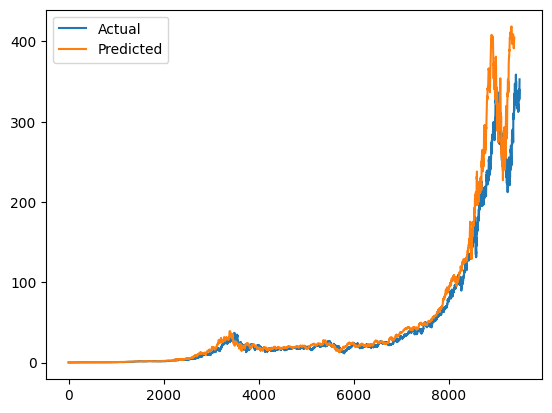

In [59]:
plt.plot(np.array(msft_df.Close), label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [60]:
# use the model to predict the last EXTRAPOLATE_DAYS
last_window = np.array(msft_df.Close)[-WINDOW_SIZE:]
complete_predictions = np.array([])
prediction = model.predict(np.array([last_window]))
prediction[0]

1/1 [==============================] - 0s 405ms/step


array([367.1828 , 367.3407 , 369.53323, 369.47736, 368.69128, 369.05496,
       368.50632, 367.59747, 367.64584, 367.67038], dtype=float32)

In [61]:
while len(complete_predictions) < EXTRAPOLATE_DAYS:
    prediction = model.predict(np.array([np.append(last_window, msft_sentiment)]))
    complete_predictions = np.concatenate((complete_predictions, prediction[0]))
    last_window = np.concatenate((last_window[DAYS_TO_TAKE_FROM_EACH_PREDICTION:], prediction[0]))

complete_predictions

1/1 [==============================] - 0s 15ms/step


array([414.48132324, 414.74893188, 417.17785645, 417.17175293,
       416.22714233, 416.85406494, 416.26782227, 415.11178589,
       415.08432007, 415.06829834, 434.92544556, 435.08621216,
       437.73773193, 437.57330322, 436.52902222, 437.21847534,
       436.58572388, 435.41149902, 435.42623901, 435.33602905,
       437.92114258, 438.06573486, 440.75024414, 440.55984497,
       439.50143433, 440.19970703, 439.56066895, 438.38516235,
       438.40740967, 438.30374146, 438.44500732, 438.58633423,
       441.27713013, 441.08151245, 440.02041626, 440.7199707 ,
       440.0802002 , 438.90481567, 438.92849731, 438.82223511,
       438.56921387, 438.70956421, 441.40206909, 441.20498657,
       440.14318848, 440.84289551, 440.20300293, 439.027771  ,
       439.05178833, 438.94491577, 438.60702515, 438.74707031,
       441.43997192, 441.24255371, 440.18048096, 440.88024902,
       440.24035645, 439.06521606, 439.08926392, 438.98226929,
       438.62081909, 438.76083374, 441.45388794, 441.25

In [62]:
model_completed_predictions = np.array(list(predictions) + list(complete_predictions))
model_completed_predictions

array([1.38933599e-01, 1.38507485e-01, 1.38320923e-01, ...,
       4.39091370e+02, 4.39115479e+02, 4.39008362e+02])

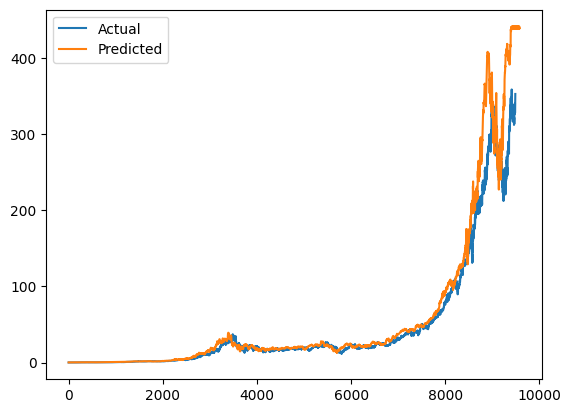

In [63]:
plt.plot(np.array(msft_df.Close), label='Actual')
plt.plot(model_completed_predictions, label='Predicted')
plt.legend()
plt.show()

In [64]:
len(model_completed_predictions)

9579

In [65]:
# save the model
model.save('stock_predictor.h5')

/Users/dhruv/Documents/TestCode/COMP3900/3900_project/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
